# Imports

In [11]:
import numpy as np
import tensorflow as tf
import keras

from IPython.core.display import display

from keras.preprocessing.image import img_to_array , load_img

from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input , decode_predictions

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_vgg , decode_predictions as decode_vgg


# Constants

In [12]:
FILE_1 = 'Images/01 Umbrella.png'
FILE_2 = 'Images/02 Couple.png'
FILE_3 = 'Images/03 Ocean.png'

# Load InceptionResNet

In [13]:
%%time
inception_model = InceptionResNetV2(weights = 'imagenet')



Wall time: 2min 8s


# Pre - Processing Images

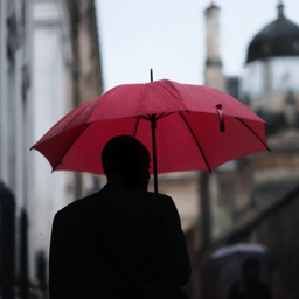

In [14]:
pic = load_img(FILE_1 ,target_size=(299 , 299 , 299))
display(pic)

In [15]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [16]:
#prediction needs 4-D array
expanded = np.expand_dims(pic_array , axis = 0)
expanded.shape

(1, 299, 299, 3)

In [17]:
preprocessed = preprocess_input(expanded)

# Making Predictions

In [18]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062965),
  ('n03788195', 'mosque', 0.0010572365),
  ('n03220513', 'dome', 0.0010311002)]]

# Using Functions

In [19]:
def format_img_inceptionresnet(filename ):
  pic = load_img(filename , target_size=(299 ,299 ))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array , axis = 0)
  preprocessed = preprocess_input(expanded)

  return preprocessed

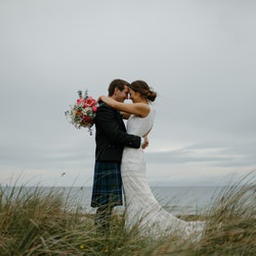

[[('n10148035', 'groom', 0.7042383),
  ('n03450230', 'gown', 0.11669556),
  ('n11879895', 'rapeseed', 0.016582644),
  ('n09421951', 'sandbar', 0.012790668),
  ('n03534580', 'hoopskirt', 0.007287771)]]

In [20]:
data = format_img_inceptionresnet(FILE_2)
prediction = inception_model.predict(data)
display(load_img(FILE_2))
decode_predictions(prediction)

In [21]:
# Using other method

def format_img_inceptionresnet(filename ):
  pic = load_img(filename , target_size=(299 ,299 ))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array , axis = 0)
  preprocessed = preprocess_input(expanded)
  prediction = inception_model.predict(preprocessed)
  decode = decode_predictions(prediction)

  return decode 

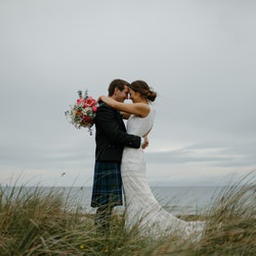

[[('n10148035', 'groom', 0.7042383),
  ('n03450230', 'gown', 0.11669556),
  ('n11879895', 'rapeseed', 0.016582644),
  ('n09421951', 'sandbar', 0.012790668),
  ('n03534580', 'hoopskirt', 0.007287771)]]

In [22]:
display(load_img(FILE_2))
format_img_inceptionresnet(FILE_2)

# <centre> **Testing the VGG19 Model** </centre>

### Loading VGG19 Model

In [23]:
vgg19_model = VGG19()

# Using Functions

In [24]:
def format_img_vgg19(filename):
  pic = load_img(filename , target_size=(224 , 224))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr , axis =0)
  preprocessed = preprocess_vgg(expanded)
  predict = vgg19_model.predict(preprocessed)
  decode = decode_vgg(predict)

  return decode

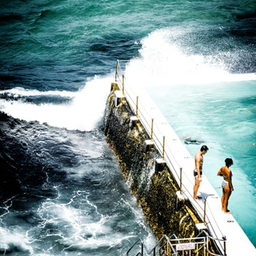

[[('n04347754', 'submarine', 0.16831185),
  ('n02894605', 'breakwater', 0.12554662),
  ('n03662601', 'lifeboat', 0.096701585),
  ('n09399592', 'promontory', 0.08424044),
  ('n02981792', 'catamaran', 0.08419337)]]

In [25]:
display(load_img(FILE_3))
format_img_vgg19(FILE_3)

## Comparision btwn InceptionResNet and VGG19 Models

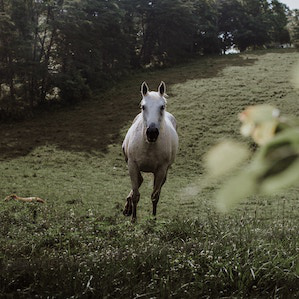

[[('n02389026', 'sorrel', 0.44831753),
  ('n02412080', 'ram', 0.029898953),
  ('n02106030', 'collie', 0.019694552),
  ('n04604644', 'worm_fence', 0.016888108),
  ('n04049303', 'rain_barrel', 0.013531352)]]

In [26]:
display(load_img('Images/04 Horse.png'))
format_img_inceptionresnet('Images/04 Horse.png')

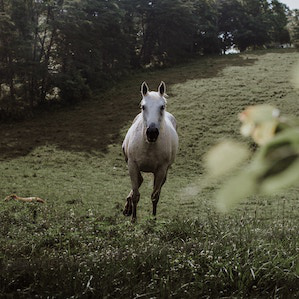

[[('n02412080', 'ram', 0.73425114),
  ('n02415577', 'bighorn', 0.116094664),
  ('n02403003', 'ox', 0.017533273),
  ('n02437616', 'llama', 0.011443083),
  ('n02091134', 'whippet', 0.009351168)]]

In [27]:
display(load_img('Images/04 Horse.png'))
format_img_vgg19('Images/04 Horse.png')

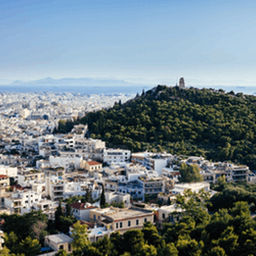

[[('n09193705', 'alp', 0.31008872),
  ('n09468604', 'valley', 0.23449735),
  ('n09332890', 'lakeside', 0.039152917),
  ('n09428293', 'seashore', 0.03560257),
  ('n09246464', 'cliff', 0.031413946)]]

In [28]:
display(load_img('Images/05 City.png'))
format_img_inceptionresnet('Images/05 City.png')

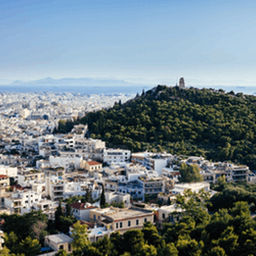

[[('n09399592', 'promontory', 0.41237336),
  ('n09428293', 'seashore', 0.25915882),
  ('n09246464', 'cliff', 0.117666475),
  ('n09193705', 'alp', 0.07332302),
  ('n09332890', 'lakeside', 0.049131956)]]

In [29]:
display(load_img('Images/05 City.png'))
format_img_vgg19('Images/05 City.png')

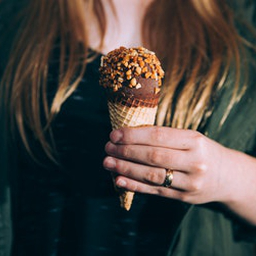

[[('n07615774', 'ice_lolly', 0.45823854),
  ('n07614500', 'ice_cream', 0.18706761),
  ('n03720891', 'maraca', 0.06899177),
  ('n03729826', 'matchstick', 0.06425364),
  ('n03759954', 'microphone', 0.021507613)]]

In [30]:
display(load_img('Images/09 Ice Cream.png'))
format_img_inceptionresnet('Images/09 Ice Cream.png')

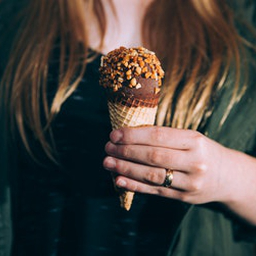

[[('n03724870', 'mask', 0.19834413),
  ('n01943899', 'conch', 0.09400192),
  ('n04259630', 'sombrero', 0.08322424),
  ('n03720891', 'maraca', 0.044131294),
  ('n04584207', 'wig', 0.040169436)]]

In [31]:
display(load_img('Images/09 Ice Cream.png'))
format_img_vgg19('Images/09 Ice Cream.png')

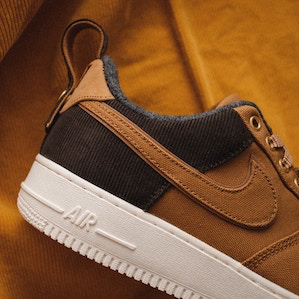

[[('n04133789', 'sandal', 0.2839319),
  ('n04120489', 'running_shoe', 0.2034971),
  ('n03680355', 'Loafer', 0.10018017),
  ('n04200800', 'shoe_shop', 0.062399317),
  ('n04026417', 'purse', 0.032476798)]]

In [32]:
display(load_img('Images/11 Shoe.png'))
format_img_inceptionresnet('Images/11 Shoe.png')

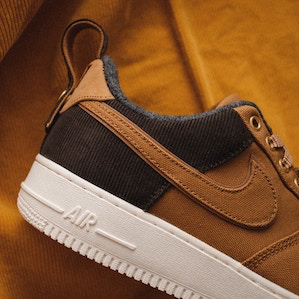

[[('n04133789', 'sandal', 0.3076622),
  ('n04026417', 'purse', 0.2826039),
  ('n03709823', 'mailbag', 0.09241968),
  ('n03908618', 'pencil_box', 0.06579638),
  ('n03680355', 'Loafer', 0.04617396)]]

In [33]:
display(load_img('Images/11 Shoe.png'))
format_img_vgg19('Images/11 Shoe.png')